# Geog 490

## Maxim Altan-Lu Shapovalov (numinorix - github)

### Feb 5, 2023

#### Assignment 5 – attempting to produce an accurate model for for predicting house prices

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Read dataset (all houses sold in King County, WA, between May 2014 and May 2015)
df = pd.read_csv('data/seattle-house-prices.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319
1,180000,2,1.00,770,10000,1933,47.7379,-122.233
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005


## ------------------------------------------QUESTION 1 -------------------------------------------------

### How many houses are in this dataset?

In [13]:
df.shape[0]

19451

### How many features are there for predicting house price?

In [14]:
df.shape[1]

8

### Are there any null values in this dataset?

In [17]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
lat            0
long           0
dtype: int64

There are no nulls in this dataset!

### Which three variables are best correlated with house price (include correlation coefficients)?

In [28]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corrs = corr_matrix['price'].sort_values(ascending = False); corrs

price          1.000000
sqft_living    0.702296
bathrooms      0.524395
bedrooms       0.315804
lat            0.308082
sqft_lot       0.090125
yr_built       0.052453
long           0.020092
Name: price, dtype: float64

sqft living and numbers of bathrooms and bedrooms, in that order

### Which three variables are least correlated with house price (include correlation coefficients)?

longitude, year built, and sqft lot

## ------------------------------------------QUESTION 2 -------------------------------------------------

### *Produce a model to predict house prices*

### 1) Feature Scaling

Must scale (or normalize) the features before training the model bc if attributes have diff scales, machine learning (ML) algorithms won't do well

Standardization scales values so that the they have mean of 0 and unit variance.

In [34]:
# Import library
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['bedrooms', 'bathrooms', 'sqft_living', 
                 'yr_built', 'lat', 'long']

# Define features and labels 
X = df[feature_list]
y = df['price']

In [38]:
# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_list)
df_scaled

,bedrooms,bathrooms,sqft_living,yr_built,lat,long
0,-0.408062,0.175445,0.532437,-0.681874,1.161695,-0.747062
1,-1.511064,-1.448357,-1.428055,-1.294903,1.283471,-0.135791
2,0.694941,1.149726,-0.131952,-0.205073,-0.280879,-1.273039
3,-0.408062,-0.149315,-0.436917,0.544185,0.410865,1.200476
4,0.694941,3.098289,3.636549,1.020985,0.694047,1.484788
...,...,...,...,...,...,...
19446,-0.408062,0.500206,-0.839907,1.259385,0.126241,-1.386764
19447,-0.408062,0.500206,-0.600292,1.293443,1.005332,-0.938973
19448,0.694941,0.500206,0.249255,1.463728,-0.353656,-1.052697
19449,-0.408062,0.500206,-0.524050,1.123157,-0.182161,1.029889


### 2) Split data in training and testing subsets

In [41]:
# get subset of data to train model; evaluation will be after on a different subset

from sklearn.model_selection import train_test_split # more importing

# Split data 
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)
#y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

### 3) Multiple linear regression (ML algorithm 1)

##### A very simple supervised algorithm that fits a linear model to our data using a least squares approach.

In [43]:
from sklearn.linear_model import LinearRegression

# Define model
lin_reg = LinearRegression()

# Fit model to data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error

# Predict test labels
predictions = lin_reg.predict(X_test)

# Compute mean-squared-error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

239413.9670007765

(0.0, 500000.0)

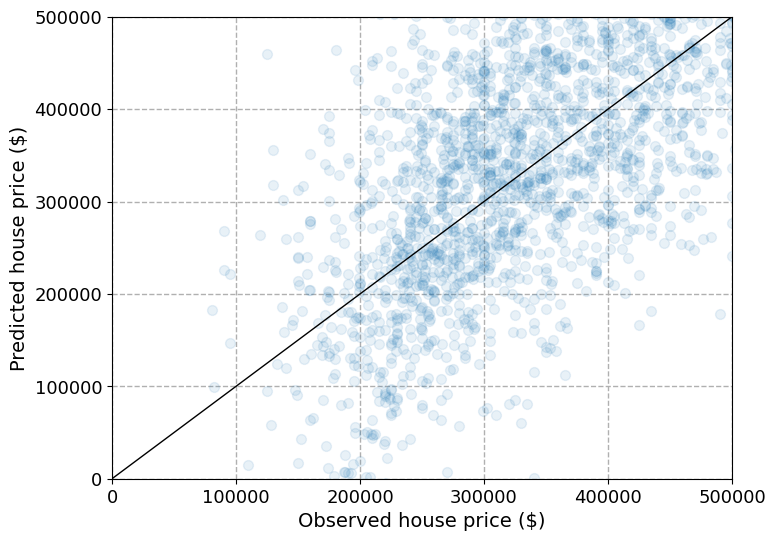

In [45]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

### 4) Decision Tree (ML algorithm 2)

##### predicts a target variable using multiple regression trees

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Define model
tree_reg = DecisionTreeRegressor()

# Fit model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
# Predict test labels
predictions = tree_reg.predict(X_test)

# Compute mean-squared-error
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

223138.07303859526

(0.0, 500000.0)

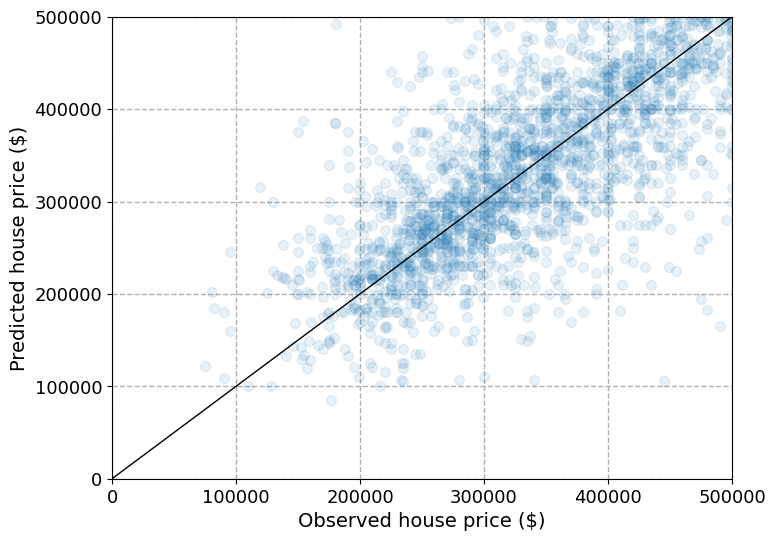

In [48]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

### 5) RandomForests (ML algorithm 3)

##### A popular ensemble algorithm that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [50]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

163734.74708738588

(0.0, 500000.0)

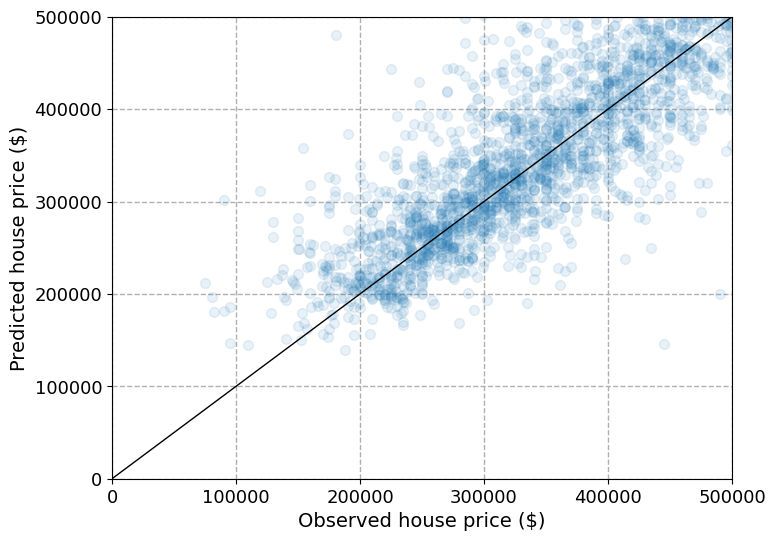

In [51]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

#### Recap:

In [53]:
print('Linear Regression:',lin_rmse,' Decision Tree:',tree_rmse,' RandomForests:',final_rmse)

Linear Regression: 239413.9670007765  Decision Tree: 223138.07303859526  RandomForests: 163734.74708738588
